# Visualize traces

This notebook gives an example how to use the released Coopernaut dataset.

First let's import the neccessary packages.

In [16]:
import sys
sys.path.append("..")

from types import SimpleNamespace
from utils.point_transformer_loader import get_data_loader
from utils.visualizers import lidar_to_bev

import open3d as o3d
from open3d.web_visualizer import draw
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

[Open3D INFO] Resetting default logger to print to terminal.


### Configure the Data Loader

Specify the flags that we would like to pass to the data loader.
Alternatively this `config` object can be passed in as an `argparser` namedspace object.

Note that the `"data"` path should be replaced as the path where you download the full dataset.

In [8]:
config = {
    "data": "../data/AutoCast_6/Train",
    "daggerdata": "../data/AutoCast_6/Dagger",
    "ego_only": False,
    "batch_size": 1,
    "num_dataloader_workers": 1,
    "use_lidar": True,
    "visualize": True,
    "shared": True,
    "earlyfusion": False,
    "max_num_neighbors": 2,
    "npoints": 65536,
    "uniform": True,
    "z_min": -4,
    "z_max": 12,
}

config = SimpleNamespace(**config)
data_loader = get_data_loader(config)

NUM = 2

-4 12


### Load one frame

In [9]:
bev_rgb, \
ego_lidar, ego_speed, ego_brake, ego_has_plan, ego_command, ego_control, \
other_lidar, other_speed, other_transform, ego_transform, num_valid_neighbors = next(iter(data_loader))

/home/hang/AutoCast_Release/Coopernaut/notebooks/../utils/point_transformer_loader.py:245: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  ego_speed, ego_brake, has_plan, command, control, other_speed, num_valid_neighbors = map(lambda i: torch.tensor(i), [ego_speed, ego_brake, has_plan, command, control,other_speed, num_valid_neighbors])


### Bird-eye's view RGB

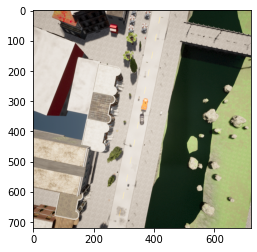

In [10]:
plt.imshow(bev_rgb[0].transpose(0,2).transpose(0,1))

### Ego LiDAR

Visualizes the ego-vehicle point-cloud in the top-down bird's-eye view.

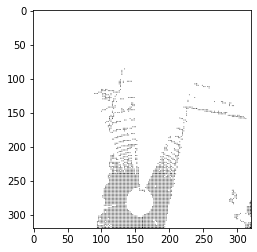

In [11]:
plt.imshow(lidar_to_bev(ego_lidar[0]), cmap="binary")

In [17]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(ego_lidar[0])

draw([pcd])

[Open3D INFO] Window window_0 created.
[Open3D INFO] EGL headless mode enabled.
[Open3D INFO] ICE servers: {"stun:stun.l.google.com:19302", "turn:user:password@34.69.27.100:3478", "turn:user:password@34.69.27.100:3478?transport=tcp"}
FEngine (64 bits) created at 0x7f4a60007c20 (threading is enabled)
[Open3D INFO] Set WEBRTC_STUN_SERVER environment variable add a customized WebRTC STUN server.
[Open3D INFO] WebRTC Jupyter handshake mode enabled.


WebVisualizer(window_uid='window_0')

EGL(1.5)
OpenGL(4.1)
[Open3D INFO] [Called HTTP API (custom handshake)] /api/getIceServers
[Open3D INFO] [Called HTTP API (custom handshake)] /api/call
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/getIceCandidate
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: open, peerid: 0.5713030428928552
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: open, peerid: 0.5713030428928552
[Open3D INFO] Sending init frames to window_0.


[000:000][13930] (stun_port.cc:96): Binding request timed out from 192.168.50.x:48793 (wlp62s0)


Alternatively we can also visualize it in a 3D scatter plot.

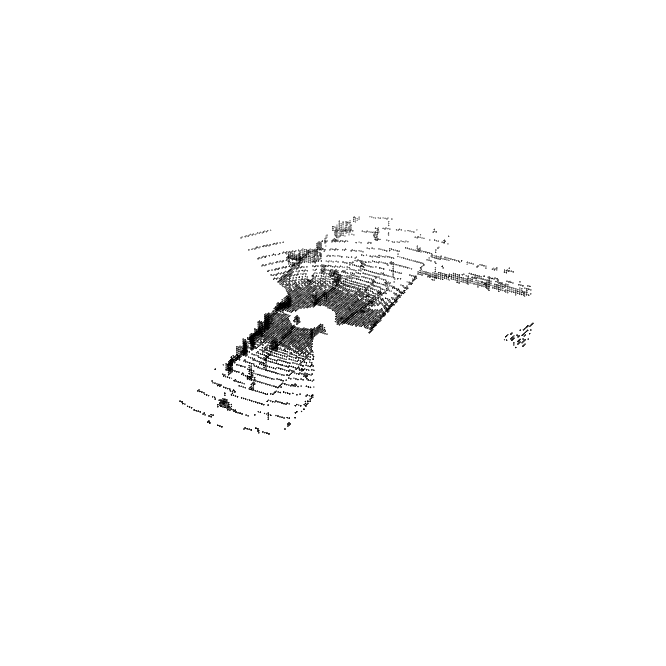

In [6]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
xs, ys, zs = ego_lidar[0,:,1], ego_lidar[0,:,0], ego_lidar[0,:,2]
ax.scatter(xs, ys, zs, s=0.01, color="black")

# Plot Style
ax.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs)))
ax.set_axis_off()

### Other LiDAR

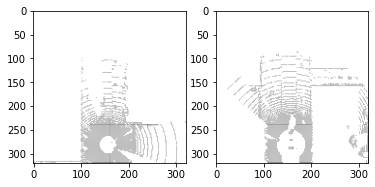

In [10]:
f, [ax1, ax2] = plt.subplots(1,2)
ax1.imshow(lidar_to_bev(other_lidar[0,0]), cmap="binary")
ax2.imshow(lidar_to_bev(other_lidar[0,1]), cmap="binary")

In [ ]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(other_lidar[0,0])
draw([pcd])
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(other_lidar[0,1])
draw([pcd])

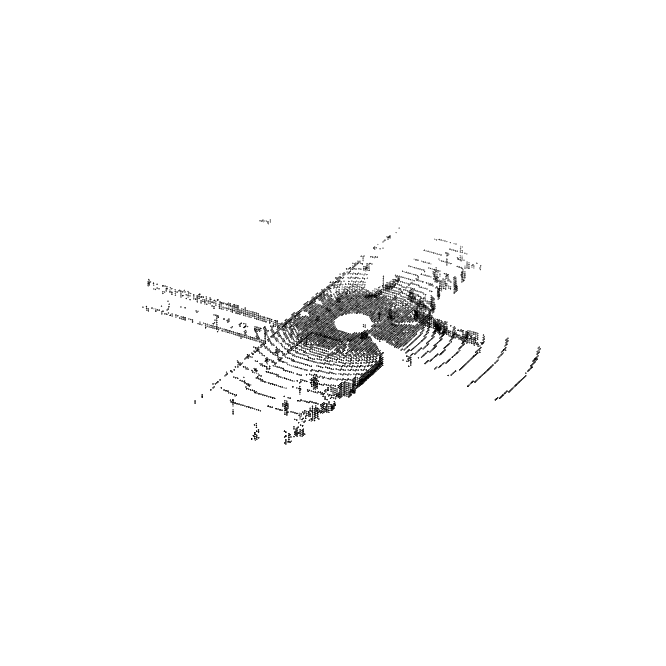

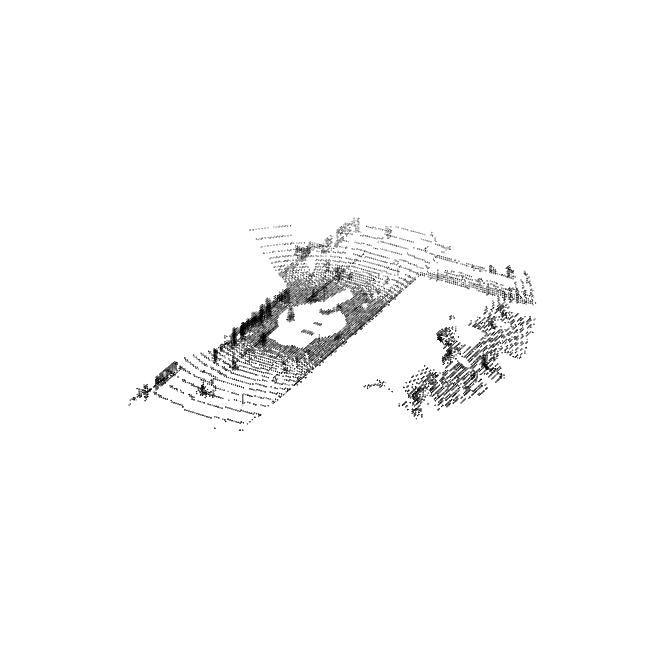

In [12]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(projection='3d')

xs, ys, zs = other_lidar[0,0,:,1], other_lidar[0,0,:,0], other_lidar[0,0,:,2]
ax1.scatter(xs, ys, zs, s=0.01, color="black")

# Plot Style
ax1.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs)))
ax1.set_axis_off()

fig = plt.figure(figsize=(12,12))
ax2 = fig.add_subplot(projection='3d')

xs, ys, zs = other_lidar[0,1,:,1], other_lidar[0,1,:,0], other_lidar[0,1,:,2]
ax2.scatter(xs, ys, zs, s=0.01, color="black")

# Plot Style
ax2.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs)))
ax2.set_axis_off()